Mount Google Drive

In [ ]:
'''!fusermount -u /content/drive  # Unmounts the drive
!rm -rf /content/drive         # Clears the mount point directory '''
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Verify Access

In [ ]:
'''import os

folder_path = '/content/drive/MyDrive/Capstone/Data/Version1/version1-images'

os.listdir(folder_path)'''


"import os\n\nfolder_path = '/content/drive/MyDrive/Capstone/Data/Version1/version1-images'\n\nos.listdir(folder_path)"

In [ ]:
'''!pip install opencv-python lxml'''

Verify correspondence between images and annotations

In [ ]:
'''import os

# Directories containing images and annotations
images_path = '/content/drive/MyDrive/Capstone/Data/Version1/version4-images'
annotations_path = '/content/drive/MyDrive/Capstone/Data/Version1/version4-annotations'

# List all files in each directory
image_files = [f.split('.')[0] for f in os.listdir(images_path) if f.endswith('.jpg')]
annotation_files = [f.split('.')[0] for f in os.listdir(annotations_path) if f.endswith('.xml')]

# Convert lists to sets for easier comparison
image_set = set(image_files)
annotation_set = set(annotation_files)

# Find missing annotations for images
missing_annotations = image_set - annotation_set
# Find missing images for annotations
missing_images = annotation_set - image_set

# Print results
if missing_annotations:
    print("Images without annotations:")
    for img in sorted(missing_annotations):
        print(f"{img}.jpg")
else:
    print("All images have corresponding annotations.")

if missing_images:
    print("\nAnnotations without images:")
    for ann in sorted(missing_images):
        print(f"{ann}.xml")
else:
    print("All annotations have corresponding images.")
'''

All images have corresponding annotations.
All annotations have corresponding images.


Image Flipping

In [ ]:
'''import os
import cv2
import xml.etree.ElementTree as ET
import shutil

# Paths to your image and annotation directories
images_path = '/content/drive/MyDrive/Capstone/Data/Version1/images'
annotations_path = '/content/drive/MyDrive/Capstone/Data/Version1/annotations'

# Directories to save the normal and flipped images and annotations
version1_images_path = '/content/drive/MyDrive/Capstone/Data/Version1/version1-images'
version1_annotations_path = '/content/drive/MyDrive/Capstone/Data/Version1/version1-annotations'

# Create the output directories if they don't exist
os.makedirs(version1_images_path, exist_ok=True)
os.makedirs(version1_annotations_path, exist_ok=True)

# Function to flip the image and update the annotation
def flip_image_and_annotation(image_path, annotation_path, flipped_image_path, flipped_annotation_path):
    # Read the image
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape

    # Flip the image horizontally
    flipped_image = cv2.flip(image, 1)
    # Save the flipped image to the flipped images directory
    cv2.imwrite(flipped_image_path, flipped_image)

    # Parse the annotation file
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    # Update bounding box coordinates for the flipped image
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        xmin = int(float(bbox.find('xmin').text))
        xmax = int(float(bbox.find('xmax').text))

        # Update xmin and xmax based on the flip
        bbox.find('xmin').text = str(image_width - xmax)
        bbox.find('xmax').text = str(image_width - xmin)

    # Save the updated annotation
    tree.write(flipped_annotation_path)

# Get the list of all image filenames
image_filenames = [f for f in os.listdir(images_path) if f.endswith(".jpg")]  # assuming images are .jpg

# Initialize the counter for image numbering
image_counter = 1
total_images = len(image_filenames)

# Loop through all images and annotations
for filename in image_filenames:
    image_path = os.path.join(images_path, filename)
    annotation_path = os.path.join(annotations_path, filename.replace(".jpg", ".xml"))

    if os.path.exists(annotation_path):
        # Save the original image and annotation to the version1 folder
        original_image_path = os.path.join(version1_images_path, f"{image_counter}.jpg")
        original_annotation_path = os.path.join(version1_annotations_path, f"{image_counter}.xml")
        shutil.copy(image_path, original_image_path)  # Save original image
        shutil.copy(annotation_path, original_annotation_path)  # Copy original annotation

        # Flip the image and save it along with the flipped annotation
        flipped_image_path = os.path.join(version1_images_path, f"{image_counter + total_images}.jpg")
        flipped_annotation_path = os.path.join(version1_annotations_path, f"{image_counter + total_images}.xml")
        flip_image_and_annotation(image_path, annotation_path, flipped_image_path, flipped_annotation_path)

        # Increment the image counter
        image_counter += 1
    else:
        print(f"Annotation file missing for {image_path}")

'''


'\nimport os\nimport cv2\nimport xml.etree.ElementTree as ET\nimport shutil\n\n# Paths to your image and annotation directories\nimages_path = \'/content/drive/MyDrive/Capstone/Data/Version1/images\'\nannotations_path = \'/content/drive/MyDrive/Capstone/Data/Version1/annotations\'\n\n# Directories to save the normal and flipped images and annotations\nversion1_images_path = \'/content/drive/MyDrive/Capstone/Data/Version1/version1-images\'\nversion1_annotations_path = \'/content/drive/MyDrive/Capstone/Data/Version1/version1-annotations\'\n\n# Create the output directories if they don\'t exist\nos.makedirs(version1_images_path, exist_ok=True)\nos.makedirs(version1_annotations_path, exist_ok=True)\n\n# Function to flip the image and update the annotation\ndef flip_image_and_annotation(image_path, annotation_path, flipped_image_path, flipped_annotation_path):\n    # Read the image\n    image = cv2.imread(image_path)\n    image_height, image_width, _ = image.shape\n\n    # Flip the image ho

Resize Images

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import xml.etree.ElementTree as ET

# Define paths
images_folder_path = '/content/drive/MyDrive/Capstone/Data/Version1/version1-images'
annotations_folder_path = '/content/drive/MyDrive/Capstone/Data/Version1/version1-annotations'
output_images_folder_path = '/content/drive/MyDrive/Capstone/Data/Version1/version1-resized_images'
output_annotations_folder_path = '/content/drive/MyDrive/Capstone/Data/Version1/version1-resized_annotations'

# Create output directories if they don't exist
os.makedirs(output_images_folder_path, exist_ok=True)
os.makedirs(output_annotations_folder_path, exist_ok=True)

# Target size
target_size = (224, 224)

# Function to resize image and adjust XML
def resize_image_and_adjust_xml(image_path, xml_path, output_image_path, output_xml_path):
    # Load image
    image = cv2.imread(image_path)
    original_height, original_width = image.shape[:2]

    # Resize image
    resized_image = cv2.resize(image, target_size)
    cv2.imwrite(output_image_path, resized_image)

    # Adjust XML
    tree = ET.parse(xml_path)
    root = tree.getroot()

    for size in root.findall('size'):
        size.find('width').text = str(target_size[0])
        size.find('height').text = str(target_size[1])

    for obj in root.findall('object'):
        xml_bndbox = obj.find('bndbox')
        xmin = int(xml_bndbox.find('xmin').text)
        ymin = int(xml_bndbox.find('ymin').text)
        xmax = int(xml_bndbox.find('xmax').text)
        ymax = int(xml_bndbox.find('ymax').text)

        # Scale bounding box
        xmin = int(xmin * target_size[0] / original_width)
        xmax = int(xmax * target_size[0] / original_width)
        ymin = int(ymin * target_size[1] / original_height)
        ymax = int(ymax * target_size[1] / original_height)

        xml_bndbox.find('xmin').text = str(xmin)
        xml_bndbox.find('ymin').text = str(ymin)
        xml_bndbox.find('xmax').text = str(xmax)
        xml_bndbox.find('ymax').text = str(ymax)

    # Write updated XML to file
    tree.write(output_xml_path)

# Process each image and corresponding XML
for filename in os.listdir(images_folder_path):
    if filename.endswith(".jpg"):  # Assuming images are in JPG format
        image_path = os.path.join(images_folder_path, filename)
        xml_filename = filename.replace(".jpg", ".xml")
        xml_path = os.path.join(annotations_folder_path, xml_filename)

        output_image_path = os.path.join(output_images_folder_path, filename)
        output_xml_path = os.path.join(output_annotations_folder_path, xml_filename)

        if os.path.exists(xml_path):  # Ensure there is a corresponding XML file
            resize_image_and_adjust_xml(image_path, xml_path, output_image_path, output_xml_path)
'''


'from google.colab import drive\ndrive.mount(\'/content/drive\')\n\nimport os\nimport cv2\nimport xml.etree.ElementTree as ET\n\n# Define paths\nimages_folder_path = \'/content/drive/MyDrive/Capstone/Data/Version1/version1-images\'\nannotations_folder_path = \'/content/drive/MyDrive/Capstone/Data/Version1/version1-annotations\'\noutput_images_folder_path = \'/content/drive/MyDrive/Capstone/Data/Version1/version1-resized_images\'\noutput_annotations_folder_path = \'/content/drive/MyDrive/Capstone/Data/Version1/version1-resized_annotations\'\n\n# Create output directories if they don\'t exist\nos.makedirs(output_images_folder_path, exist_ok=True)\nos.makedirs(output_annotations_folder_path, exist_ok=True)\n\n# Target size\ntarget_size = (224, 224)\n\n# Function to resize image and adjust XML\ndef resize_image_and_adjust_xml(image_path, xml_path, output_image_path, output_xml_path):\n    # Load image\n    image = cv2.imread(image_path)\n    original_height, original_width = image.shape[:2

Normalize Images

In [ ]:
'''import os
import cv2
import numpy as np

# Paths to the resized images and the output directory for normalized images
resized_images_folder_path = '/content/drive/MyDrive/Capstone/Data/Version1/version4-resized_images'
output_normalized_images_folder_path = '/content/drive/MyDrive/Capstone/Data/Version1/version4-normalized_images'

# Create output directory if it doesn't exist
os.makedirs(output_normalized_images_folder_path, exist_ok=True)

# Function to normalize the pixel values of an image
def normalize_image(image_path, output_image_path):
    # Load image
    image = cv2.imread(image_path)

    # Normalize the pixel values to the range [0, 1]
    normalized_image = image / 255.0

    # Convert the normalized image to float32 format
    normalized_image = normalized_image.astype(np.float32)

    # Save the normalized image
    # We save it as a .png to preserve the float32 format.
    cv2.imwrite(output_image_path, normalized_image)




# Process each resized image
for filename in os.listdir(resized_images_folder_path):
      if filename.endswith(".jpg"):  # Assuming images are in JPG format
          image_path = os.path.join(resized_images_folder_path, filename)
          output_image_path = os.path.join(output_normalized_images_folder_path, filename)

          # Normalize the image and save it
          normalize_image(image_path, output_image_path)

'''


New Work

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import xml.etree.ElementTree as ET

# Define paths
images_folder_path = '/content/drive/MyDrive/Capstone/Data/verification/images_small'
annotations_folder_path = '/content/drive/MyDrive/Capstone/Data/verification/annotations_small'
output_images_folder_path = '/content/drive/MyDrive/Capstone/Data/verification/resized_images'
output_annotations_folder_path = '/content/drive/MyDrive/Capstone/Data/verification/resized_annotations'

# Create output directories if they don't exist
os.makedirs(output_images_folder_path, exist_ok=True)
os.makedirs(output_annotations_folder_path, exist_ok=True)

# Target size
target_size = (224, 224)

# Function to resize image and adjust XML
def resize_image_and_adjust_xml(image_path, xml_path, output_image_path, output_xml_path):
    # Load image
    image = cv2.imread(image_path)
    original_height, original_width = image.shape[:2]

    # Resize image
    resized_image = cv2.resize(image, target_size)
    cv2.imwrite(output_image_path, resized_image)

    # Adjust XML
    tree = ET.parse(xml_path)
    root = tree.getroot()

    for size in root.findall('size'):
        size.find('width').text = str(target_size[0])
        size.find('height').text = str(target_size[1])

    for obj in root.findall('object'):
        xml_bndbox = obj.find('bndbox')
        xmin = int(xml_bndbox.find('xmin').text)
        ymin = int(xml_bndbox.find('ymin').text)
        xmax = int(xml_bndbox.find('xmax').text)
        ymax = int(xml_bndbox.find('ymax').text)

        # Scale bounding box
        xmin = int(xmin * target_size[0] / original_width)
        xmax = int(xmax * target_size[0] / original_width)
        ymin = int(ymin * target_size[1] / original_height)
        ymax = int(ymax * target_size[1] / original_height)

        xml_bndbox.find('xmin').text = str(xmin)
        xml_bndbox.find('ymin').text = str(ymin)
        xml_bndbox.find('xmax').text = str(xmax)
        xml_bndbox.find('ymax').text = str(ymax)

    # Write updated XML to file
    tree.write(output_xml_path)

# Process each image and corresponding XML
for filename in os.listdir(images_folder_path):
    if filename.endswith(".jpg"):  # Assuming images are in JPG format
        image_path = os.path.join(images_folder_path, filename)
        xml_filename = filename.replace(".jpg", ".xml")
        xml_path = os.path.join(annotations_folder_path, xml_filename)

        output_image_path = os.path.join(output_images_folder_path, filename)
        output_xml_path = os.path.join(output_annotations_folder_path, xml_filename)

        if os.path.exists(xml_path):  # Ensure there is a corresponding XML file
            resize_image_and_adjust_xml(image_path, xml_path, output_image_path, output_xml_path)
'''


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''import os
import cv2
import numpy as np

# Paths to the resized images and the output directory for normalized images
resized_images_folder_path = '/content/drive/MyDrive/Capstone/Data/verification/resized_images'
output_normalized_images_folder_path = '/content/drive/MyDrive/Capstone/Data/verification/normalized_images'

# Create output directory if it doesn't exist
os.makedirs(output_normalized_images_folder_path, exist_ok=True)

# Function to normalize the pixel values of an image
def normalize_image(image_path, output_image_path):
    # Load image
    image = cv2.imread(image_path)

    # Normalize the pixel values to the range [0, 1]
    normalized_image = image / 255.0

    # Convert the normalized image to float32 format
    normalized_image = normalized_image.astype(np.float32)

    # Save the normalized image
    # We save it as a .png to preserve the float32 format.
    cv2.imwrite(output_image_path, normalized_image)




# Process each resized image
for filename in os.listdir(resized_images_folder_path):
      if filename.endswith(".jpg"):  # Assuming images are in JPG format
          image_path = os.path.join(resized_images_folder_path, filename)
          output_image_path = os.path.join(output_normalized_images_folder_path, filename)

          # Normalize the image and save it
          normalize_image(image_path, output_image_path)


'''

In [ ]:
'''import os
import xml.etree.ElementTree as ET

def extract_class_names(annotation_dir):
    """
    Extract unique class names from annotation files.

    Args:
        annotation_dir (str): Path to the directory containing XML annotation files.

    Returns:
        set: A set of unique class names.
    """
    class_names = set()

    for filename in os.listdir(annotation_dir):
        if filename.endswith(".xml"):
            file_path = os.path.join(annotation_dir, filename)
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Iterate over all objects in the annotation
            for obj in root.findall("object"):
                label = obj.find("name").text
                class_names.add(label)

    return class_names

# Path to your annotation directory
annotation_dir = '/content/drive/MyDrive/Capstone/Data/Version1/version4-resized_annotations'

# Extract and print class names
class_names = extract_class_names(annotation_dir)
print("Unique Class Names:", class_names)
print("Number of Classes:",len(class_names))
'''

Unique Class Names: {'boxer2cut', 'unsuccessfulhookboxer1', 'successfulhookboxer2', 'successfulhookboxer1', 'boxer2', 'unsuccessfulhookboxer2', 'successfulstraightpunchboxer1', 'unsuccessfulstraightpunchboxer1', 'boxer1knockdown', 'successfulstraightpunchboxer2', 'unsuccessfulstraightpunchboxer2', 'boxer2knockdown', 'boxer1'}
Number of Classes: 13


In [ ]:
'''import os
import xml.etree.ElementTree as ET

# Paths to your annotation files
annotation_dir = '/content/drive/MyDrive/Capstone/Data/Version1/version4-resized_annotations'

# Function to check for XML files with zero bounding boxes
def check_zero_bounding_boxes(annotation_dir):
    zero_bbox_files = []

    # Get the list of all XML annotation files
    annotation_files = sorted(os.listdir(annotation_dir))

    for ann_file in annotation_files:
        ann_path = os.path.join(annotation_dir, ann_file)

        # Parse the XML annotation file
        tree = ET.parse(ann_path)
        root = tree.getroot()

        # Find all objects in the annotation
        boxes = []
        for obj in root.findall("object"):
            bbox = obj.find("bndbox")
            if bbox is not None:
                xmin = int(bbox.find("xmin").text)
                ymin = int(bbox.find("ymin").text)
                xmax = int(bbox.find("xmax").text)
                ymax = int(bbox.find("ymax").text)
                boxes.append([xmin, ymin, xmax, ymax])

        # Check if there are zero bounding boxes in the file
        if len(boxes) == 0:
            zero_bbox_files.append(ann_file)

    return zero_bbox_files

# Get the list of annotation files with zero bounding boxes
zero_bbox_files = check_zero_bounding_boxes(annotation_dir)

# Print the files with zero bounding boxes
if zero_bbox_files:
    print("XML files with zero bounding boxes:")
    for file in zero_bbox_files:
        print(file)
else:
    print("No files with zero bounding boxes were found.")
'''

No files with zero bounding boxes were found.


YOLO

In [ ]:
'''import os
import xml.etree.ElementTree as ET

def convert_to_yolo_format(xml_dir, output_dir, image_width=224, image_height=224, class_to_index=None):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for xml_file in os.listdir(xml_dir):
        if not xml_file.endswith(".xml"):
            continue

        tree = ET.parse(os.path.join(xml_dir, xml_file))
        root = tree.getroot()

        output_file = os.path.join(output_dir, xml_file.replace('.xml', '.txt'))
        with open(output_file, 'w') as f:
            for obj in root.findall('object'):
                bbox = obj.find('bndbox')
                xmin = int(bbox.find('xmin').text) / image_width
                ymin = int(bbox.find('ymin').text) / image_height
                xmax = int(bbox.find('xmax').text) / image_width
                ymax = int(bbox.find('ymax').text) / image_height
                class_name = obj.find('name').text

                if class_to_index is not None:
                    class_id = class_to_index[class_name]
                else:
                    class_id = class_name  # Use class names if no mapping is provided.

                center_x = (xmin + xmax) / 2
                center_y = (ymin + ymax) / 2
                width = xmax - xmin
                height = ymax - ymin

                f.write(f"{class_id} {center_x} {center_y} {width} {height}\n")

yolo_dir = '/content/drive/MyDrive/Capstone/Data/Version1/version4-yolo_annotations'
annotation_dir = '/content/drive/MyDrive/Capstone/Data/Version1/version4-resized_annotations'

convert_to_yolo_format(annotation_dir, yolo_dir, image_width=224, image_height=224, class_to_index=None)
'''

In [ ]:
'''import os

# Define the class mappings
class_mapping = {
    'boxer1': 0,
    'boxer2': 1,
    'successfulstraightpunchboxer1': 2,
    'successfulstraightpunchboxer2': 3,
    'unsuccessfulstraightpunchboxer1': 4,
    'unsuccessfulstraightpunchboxer2': 5,
    'successfulhookboxer1': 6,
    'successfulhookboxer2': 7,
    'unsuccessfulhookboxer1': 8,
    'unsuccessfulhookboxer2': 9,
    'boxer1cut': 10,
    'boxer2cut': 11,
    'boxer1knockdown': 12,
    'boxer2knockdown': 13
}

# Directory containing the YOLO label files (replace with your path)
label_dir = '/content/drive/MyDrive/Capstone/Data/Version1/version4-yolo_annotations'

# Function to convert labels
def convert_label_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Open the file for writing back the converted labels
    with open(file_path, 'w') as file:
        for line in lines:
            parts = line.strip().split()
            if len(parts) < 5:
                continue  # Skip invalid lines
            label = parts[0]  # The class name
            if label in class_mapping:
                # Convert the label to class ID
                class_id = class_mapping[label]
                # Normalize the bounding box (assuming it's already normalized, else do normalization)
                bbox = ' '.join(parts[1:])
                file.write(f"{class_id} {bbox}\n")
            else:
                print(f"Warning: Label '{label}' not found in mapping, skipping.")

# Process each label file in the directory
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        convert_label_file(os.path.join(label_dir, label_file))

print("Label files converted successfully.")
'''

Label files converted successfully.


In [ ]:
!pip install ultralytics

In [ ]:
'''import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
image_dir = '/content/drive/MyDrive/Capstone/Data/Version1/version4-normalized_images'
yolo_dir = '/content/drive/MyDrive/Capstone/Data/Version1/version4-yolo_annotations'
output_dir = '/content/drive/MyDrive/Capstone/Data/Version1/version4-yolo_dataset'

# Create output folders
os.makedirs(f"{output_dir}/images/train", exist_ok=True)
os.makedirs(f"{output_dir}/images/val", exist_ok=True)
os.makedirs(f"{output_dir}/labels/train", exist_ok=True)
os.makedirs(f"{output_dir}/labels/val", exist_ok=True)

# Get list of images and corresponding labels
images = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
labels = sorted([f for f in os.listdir(yolo_dir) if f.endswith('.txt')])

# Ensure matching file names
images = [img for img in images if img.replace('.jpg', '.txt') in labels]

# Split into train and val sets
train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

# Move files
for img_set, split in zip([train_imgs, val_imgs], ['train', 'val']):
    for img in img_set:
        # Move image
        shutil.copy(os.path.join(image_dir, img), f"{output_dir}/images/{split}/{img}")
        # Move corresponding label
        label_file = img.replace('.jpg', '.txt')
        shutil.copy(os.path.join(yolo_dir, label_file), f"{output_dir}/labels/{split}/{label_file}")
'''

In [ ]:
'''from ultralytics import YOLO

# Train the model
model = YOLO('yolov8n.pt')  # Using YOLOv8 Nano as an example
model.train(
    data='/content/drive/MyDrive/Capstone/Data/Version1/version4-data.yaml',
    epochs=50, imgsz=224, batch=16,
    save=True,  # Ensure the model is saved
    project='/content/drive/MyDrive/Capstone/Data/Version1/version4-runs_1',  # Specify where to save the model
    name='train_results'  # Specify a name for the experiment
)
'''

In [ ]:

!pip install ultralytics
from ultralytics import YOLO

# Load the trained model (best model)
model = YOLO('/content/drive/MyDrive/Capstone/Data/Version1/version4-runs_1/train_results4/weights/best.pt')  # Use the correct path



image 1/1 /content/drive/MyDrive/Capstone/Data/Version1/version4-yolo_dataset/images/val/frame_30.jpg: 224x224 1 boxer1, 1 boxer2, 187.9ms
Speed: 6.5ms preprocess, 187.9ms inference, 32.7ms postprocess per image at shape (1, 3, 224, 224)


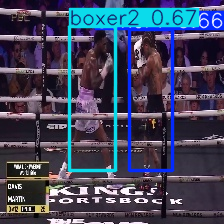

'results_frame_30.jpg'

In [ ]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained YOLO model (ensure correct path)
model = YOLO('/content/drive/MyDrive/Capstone/Data/Version1/version4-runs_1/train_results4/weights/best.pt')  # Path to the saved model

# Predict on a test image
results = model.predict('/content/drive/MyDrive/Capstone/Data/Version1/version4-yolo_dataset/images/val/frame_30.jpg')  # Path to the test image

result = results[0]

# Visualize the results
result.show()  # This will display the image with bounding boxes and class labels

# Alternatively, you can save the result to a new image file
result.save()


In [ ]:
'''import cv2
import os
import numpy as np
from ultralytics import YOLO  # Assuming YOLO model is used for object detection

# Paths and configurations
video_path = "/content/drive/MyDrive/Capstone/Data/testvideo/testvideo.mp4"  # Path to the input video
output_dir = "/content/drive/MyDrive/Capstone/Data/testvideo/frames"
output_video_path = "/content/drive/MyDrive/Capstone/Data/testvideo/output_video.mp4"
model_path = "/content/drive/MyDrive/Capstone/Data/Version1/version4-runs_1/train_results4/weights/best.pt"  # Trained YOLO model path
frame_size = (224, 224)  # Desired frame size for the model

# Step 1: Extract frames from video
def extract_frames(video_path, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_filename = os.path.join(output_dir, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        frame_count += 1
    cap.release()
    return frame_count

# Step 2: Resize frame for model input
def resize_frame(frame, size):
    return cv2.resize(frame, size)

# Step 3: Run object detection model on frames
def detect_and_label_frames(frames_dir, output_dir, model_path, size):
    model = YOLO(model_path)  # Load the YOLO model
    os.makedirs(output_dir, exist_ok=True)
    frame_files = sorted([f for f in os.listdir(frames_dir) if f.endswith(".jpg")])

    for frame_file in frame_files:
        frame_path = os.path.join(frames_dir, frame_file)
        frame = cv2.imread(frame_path)
        resized_frame = resize_frame(frame, size)

        # Run model inference
        results = model(resized_frame)
        boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding boxes
        scores = results[0].boxes.conf.cpu().numpy()  # Confidence scores
        classes = results[0].boxes.cls.cpu().numpy()  # Class IDs
        names = model.names  # Class names

        # Overlay bounding boxes and labels
        for box, score, cls in zip(boxes, scores, classes):
            x1, y1, x2, y2 = map(int, box)
            label = f"{names[int(cls)]} {score:.2f}"
            cv2.rectangle(resized_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(resized_frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # Save the labeled frame
        output_frame_path = os.path.join(output_dir, frame_file)
        cv2.imwrite(output_frame_path, resized_frame)

# Step 4: Create a video from labeled frames
def create_video_from_frames(frames_dir, output_video_path, fps=30, size=(224, 224)):
    frame_files = sorted([f for f in os.listdir(frames_dir) if f.endswith(".jpg")])
    frame_example = cv2.imread(os.path.join(frames_dir, frame_files[0]))
    height, width, _ = frame_example.shape

    video_writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))

    for frame_file in frame_files:
        frame_path = os.path.join(frames_dir, frame_file)
        frame = cv2.imread(frame_path)
        video_writer.write(frame)

    video_writer.release()

# Step 5: Main function to run the pipeline
def main():
    print("Extracting frames...")
    num_frames = extract_frames(video_path, output_dir)
    print(f"Extracted {num_frames} frames.")

    print("Detecting and labeling frames...")
    labeled_frames_dir = "labeled_frames"
    detect_and_label_frames(output_dir, labeled_frames_dir, model_path, frame_size)

    print("Creating video from labeled frames...")
    create_video_from_frames(labeled_frames_dir, output_video_path)

    print(f"Labeled video saved to {output_video_path}")

if __name__ == "__main__":
    main()
'''

Visualizations

In [ ]:
predictions_file = "/content/drive/MyDrive/Capstone/Data/testvideo/predictions.txt"

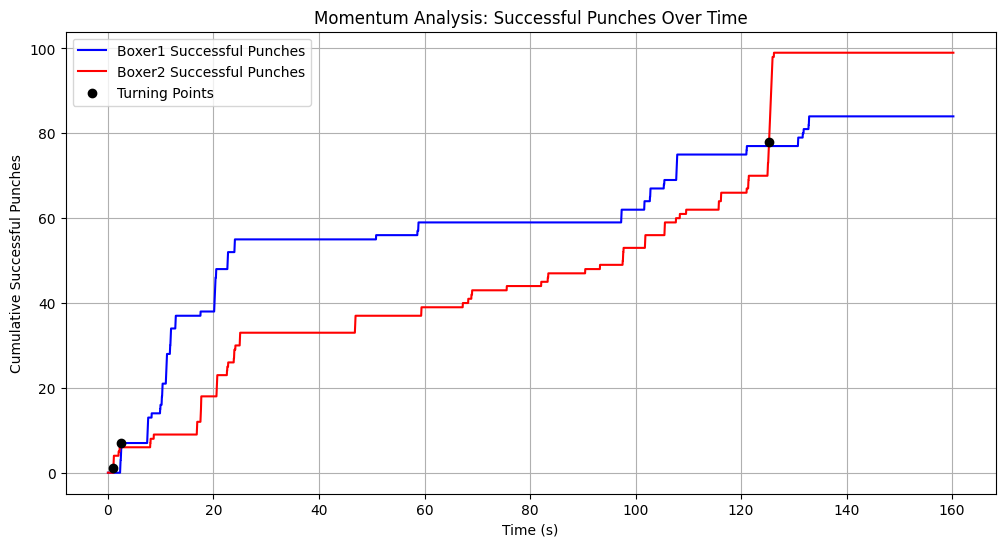

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative successful punches for each boxer
def calculate_successful_punches(predictions):
    successful_punches_boxer1 = []
    successful_punches_boxer2 = []

    total_successful_boxer1 = 0
    total_successful_boxer2 = 0

    for frame in predictions:
        # Successful punches for each boxer
        punches_boxer1 = frame[2] + frame[6]  # Boxer1's successful punches (straight + hook)
        punches_boxer2 = frame[3] + frame[7]  # Boxer2's successful punches (straight + hook)

        total_successful_boxer1 += punches_boxer1
        total_successful_boxer2 += punches_boxer2

        successful_punches_boxer1.append(total_successful_boxer1)
        successful_punches_boxer2.append(total_successful_boxer2)

    return successful_punches_boxer1, successful_punches_boxer2

# Identify critical turning points where one boxer overtakes the other
def detect_turning_points(cumulative_boxer1, cumulative_boxer2):
    turning_points = []

    for i in range(1, len(cumulative_boxer1)):
        if (cumulative_boxer1[i - 1] <= cumulative_boxer2[i - 1] and cumulative_boxer1[i] > cumulative_boxer2[i]) or \
           (cumulative_boxer1[i - 1] >= cumulative_boxer2[i - 1] and cumulative_boxer1[i] < cumulative_boxer2[i]):
            turning_points.append(i)

    return turning_points

# Plot momentum analysis
def plot_momentum_analysis(cumulative_boxer1, cumulative_boxer2, frame_rate=30):
    time = np.arange(len(cumulative_boxer1)) / frame_rate  # Convert frames to seconds

    # Detect turning points
    turning_points = detect_turning_points(cumulative_boxer1, cumulative_boxer2)

    plt.figure(figsize=(12, 6))

    # Plot cumulative successful punches
    plt.plot(time, cumulative_boxer1, label="Boxer1 Successful Punches", color="blue")
    plt.plot(time, cumulative_boxer2, label="Boxer2 Successful Punches", color="red")

    # Highlight turning points
    plt.scatter(
        [time[i] for i in turning_points],
        [max(cumulative_boxer1[i], cumulative_boxer2[i]) for i in turning_points],
        color="black",
        label="Turning Points",
        zorder=5
    )

    plt.title("Momentum Analysis: Successful Punches Over Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Cumulative Successful Punches")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution for momentum analysis
predictions = load_predictions(predictions_file)
successful_punches_boxer1, successful_punches_boxer2 = calculate_successful_punches(predictions)
plot_momentum_analysis(successful_punches_boxer1, successful_punches_boxer2)


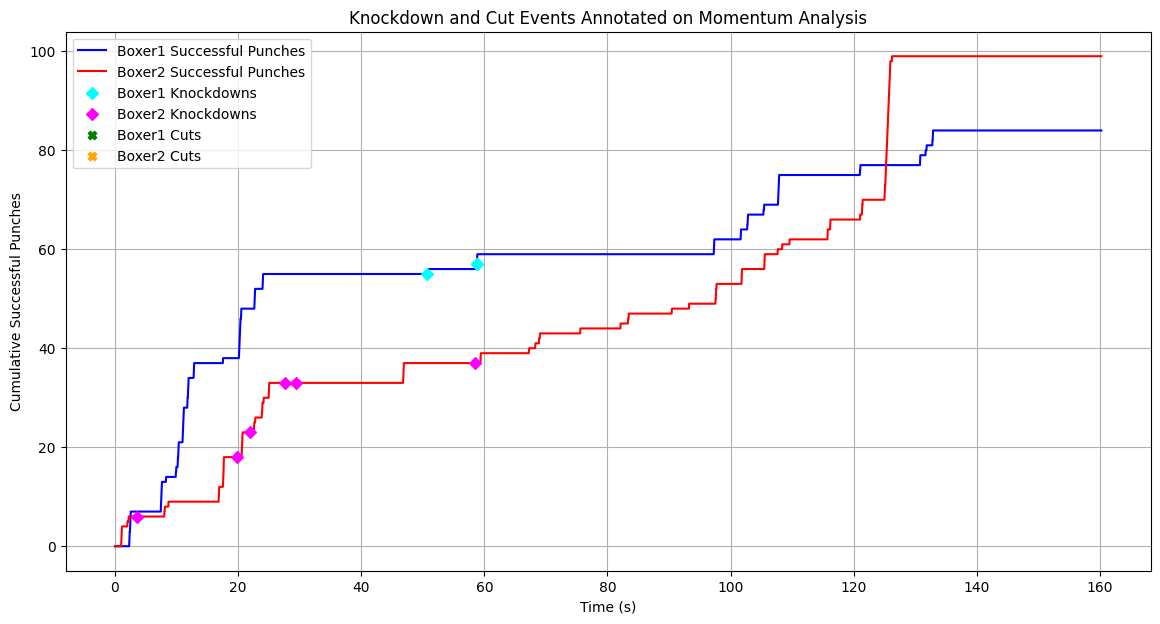

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract knockdown and cut events
def extract_events(predictions):
    knockdowns_boxer1 = []
    knockdowns_boxer2 = []
    cuts_boxer1 = []
    cuts_boxer2 = []

    for i, frame in enumerate(predictions):
        # Knockdowns
        if frame[8] == 1:  # Boxer1 Knockdown
            knockdowns_boxer1.append(i)
        if frame[9] == 1:  # Boxer2 Knockdown
            knockdowns_boxer2.append(i)

        # Cuts
        if frame[10] == 1:  # Boxer1 Cut
            cuts_boxer1.append(i)
        if frame[11] == 1:  # Boxer2 Cut
            cuts_boxer2.append(i)

    return knockdowns_boxer1, knockdowns_boxer2, cuts_boxer1, cuts_boxer2

# Plot knockdown and cut events with cumulative punches
def plot_knockdown_and_cut_events(
    cumulative_boxer1, cumulative_boxer2, knockdowns, cuts, frame_rate=30
):
    time = np.arange(len(cumulative_boxer1)) / frame_rate  # Convert frames to seconds

    knockdowns_boxer1, knockdowns_boxer2 = knockdowns
    cuts_boxer1, cuts_boxer2 = cuts

    plt.figure(figsize=(14, 7))

    # Plot cumulative successful punches
    plt.plot(time, cumulative_boxer1, label="Boxer1 Successful Punches", color="blue")
    plt.plot(time, cumulative_boxer2, label="Boxer2 Successful Punches", color="red")

    # Mark knockdowns
    plt.scatter(
        [frame / frame_rate for frame in knockdowns_boxer1],
        [cumulative_boxer1[frame] for frame in knockdowns_boxer1],
        color="cyan",
        label="Boxer1 Knockdowns",
        zorder=5,
        marker="D",
    )
    plt.scatter(
        [frame / frame_rate for frame in knockdowns_boxer2],
        [cumulative_boxer2[frame] for frame in knockdowns_boxer2],
        color="magenta",
        label="Boxer2 Knockdowns",
        zorder=5,
        marker="D",
    )

    # Mark cuts
    plt.scatter(
        [frame / frame_rate for frame in cuts_boxer1],
        [cumulative_boxer1[frame] for frame in cuts_boxer1],
        color="green",
        label="Boxer1 Cuts",
        zorder=5,
        marker="X",
    )
    plt.scatter(
        [frame / frame_rate for frame in cuts_boxer2],
        [cumulative_boxer2[frame] for frame in cuts_boxer2],
        color="orange",
        label="Boxer2 Cuts",
        zorder=5,
        marker="X",
    )

    # Title and labels
    plt.title("Knockdown and Cut Events Annotated on Momentum Analysis")
    plt.xlabel("Time (s)")
    plt.ylabel("Cumulative Successful Punches")
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract knockdowns and cuts
knockdowns_boxer1, knockdowns_boxer2, cuts_boxer1, cuts_boxer2 = extract_events(predictions)

# Group the events for easier passing to the plotting function
knockdowns = (knockdowns_boxer1, knockdowns_boxer2)
cuts = (cuts_boxer1, cuts_boxer2)

# Plot annotated events
plot_knockdown_and_cut_events(successful_punches_boxer1, successful_punches_boxer2, knockdowns, cuts)



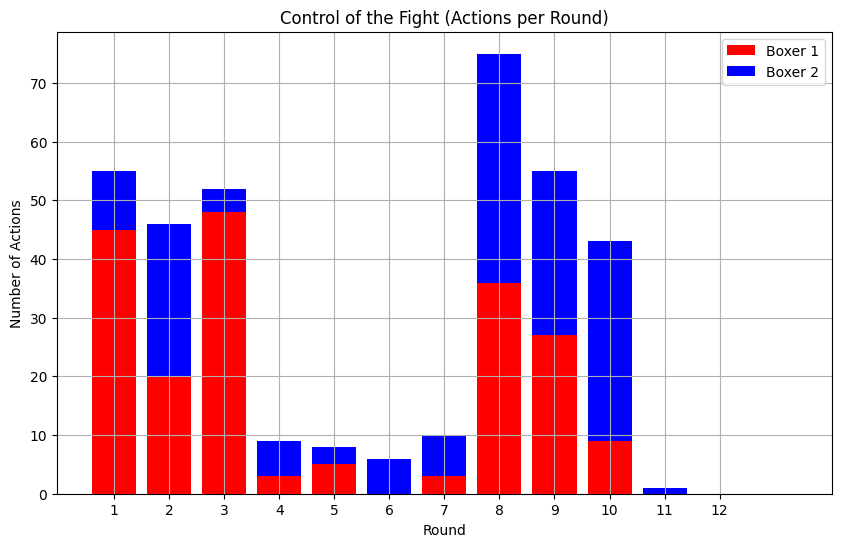

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the class labels
class_labels = [
    'boxer1', 'boxer2',
    'successfulstraightpunchboxer1', 'successfulstraightpunchboxer2',
    'unsuccessfulstraightpunchboxer1', 'unsuccessfulstraightpunchboxer2',
    'successfulhookboxer1', 'successfulhookboxer2',
    'unsuccessfulhookboxer1', 'unsuccessfulhookboxer2',
    'boxer1cut', 'boxer2cut',
    'boxer1knockdown', 'boxer2knockdown'
]

# Function to read predictions from the file
def read_predictions(file_path):
    predictions = []

    with open(file_path, 'r') as f:
        for line in f:
            # Remove any unwanted spaces and split by commas, then convert each part to an integer
            prediction = list(map(int, line.strip().split(',')))
            predictions.append(prediction)

    return predictions

# Function to calculate actions by round
def calculate_actions_by_round(predictions, num_rounds=12):
    round_actions = {'round': [], 'boxer1_actions': [], 'boxer2_actions': []}

    total_frames = len(predictions)
    round_length = total_frames // num_rounds  # Calculate round length based on total frames

    for i, prediction in enumerate(predictions):
        round_num = i // round_length  # Determine which round the frame belongs to

        # Ensure that we create only num_rounds rounds
        if round_num == len(round_actions['round']):
            round_actions['round'].append(round_num + 1)
            round_actions['boxer1_actions'].append(0)
            round_actions['boxer2_actions'].append(0)

        boxer1_actions = prediction[class_labels.index('successfulstraightpunchboxer1')] + \
                          prediction[class_labels.index('successfulhookboxer1')] + \
                          prediction[class_labels.index('unsuccessfulstraightpunchboxer1')] + \
                          prediction[class_labels.index('unsuccessfulhookboxer1')] + \
                          prediction[class_labels.index('boxer1cut')] + \
                          prediction[class_labels.index('boxer1knockdown')]

        boxer2_actions = prediction[class_labels.index('successfulstraightpunchboxer2')] + \
                          prediction[class_labels.index('successfulhookboxer2')] + \
                          prediction[class_labels.index('unsuccessfulstraightpunchboxer2')] + \
                          prediction[class_labels.index('unsuccessfulhookboxer2')] + \
                          prediction[class_labels.index('boxer2cut')] + \
                          prediction[class_labels.index('boxer2knockdown')]

        round_actions['boxer1_actions'][round_num] += boxer1_actions
        round_actions['boxer2_actions'][round_num] += boxer2_actions

    return pd.DataFrame(round_actions)

# Path to your predictions file
predictions_file = "/content/drive/MyDrive/Capstone/Data/testvideo/predictions.txt"

# Read the predictions from the file
predictions = read_predictions(predictions_file)

# Calculate actions by round
actions_df = calculate_actions_by_round(predictions)

# Plot stacked bar chart for control of the fight with only 5 rounds
plt.figure(figsize=(10, 6))
plt.bar(actions_df['round'], actions_df['boxer1_actions'], label="Boxer 1", color='red')
plt.bar(actions_df['round'], actions_df['boxer2_actions'], label="Boxer 2", bottom=actions_df['boxer1_actions'], color='blue')

# Add labels and title
plt.xlabel('Round')
plt.ylabel('Number of Actions')
plt.title('Control of the Fight (Actions per Round)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure the x-axis shows only rounds 1 through 5
plt.show()


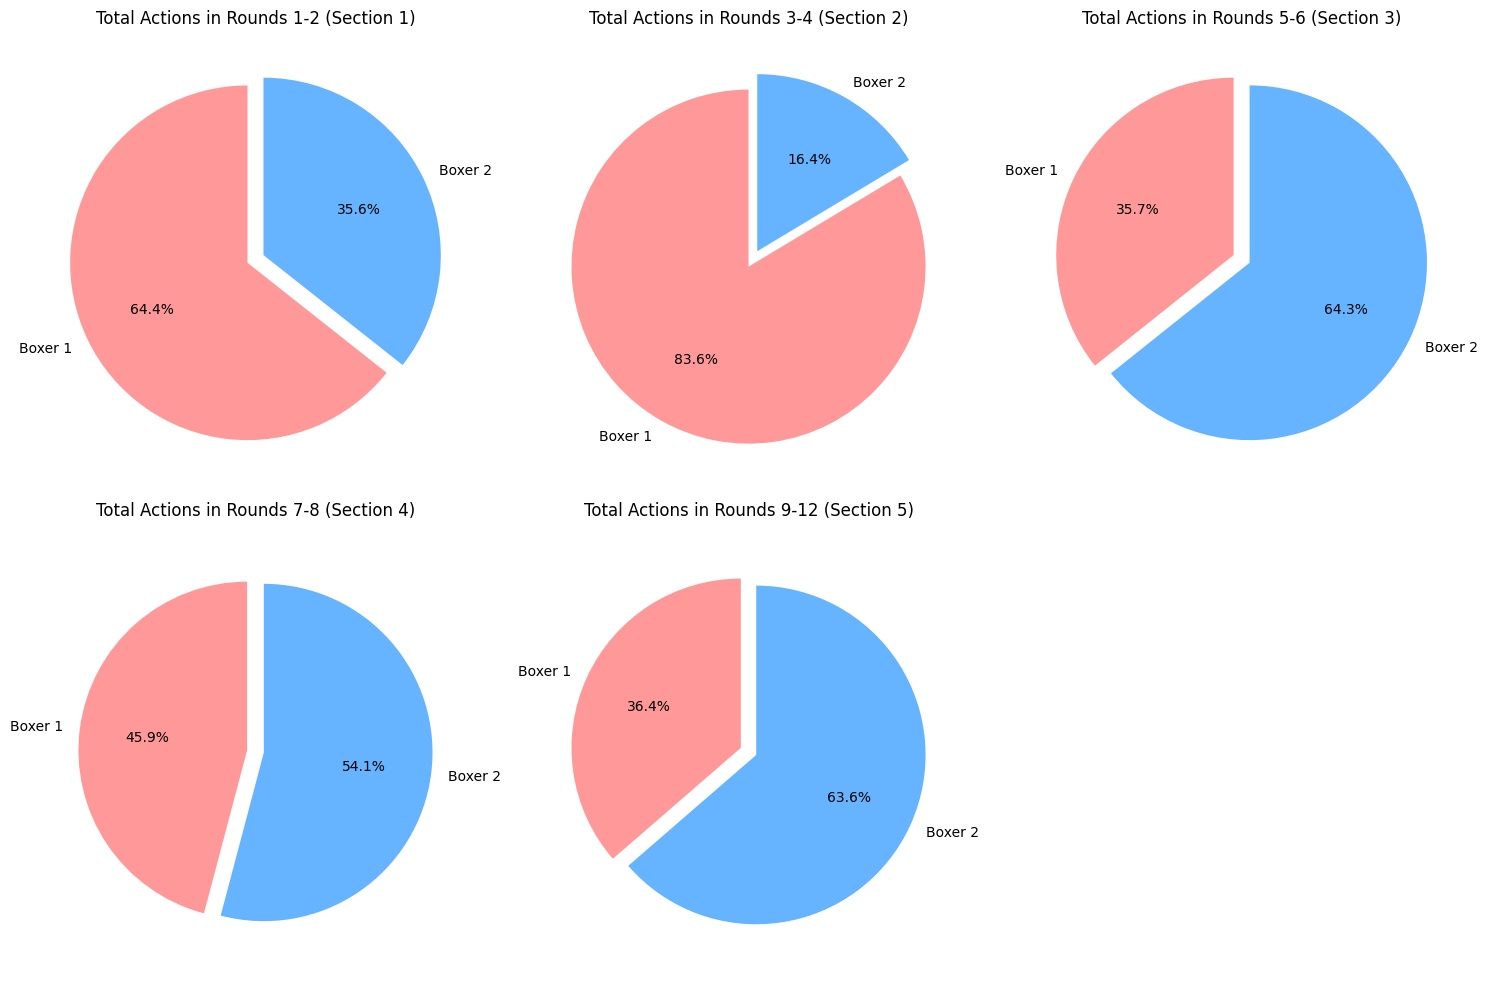

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the class labels
class_labels = [
    'boxer1', 'boxer2',
    'successfulstraightpunchboxer1', 'successfulstraightpunchboxer2',
    'unsuccessfulstraightpunchboxer1', 'unsuccessfulstraightpunchboxer2',
    'successfulhookboxer1', 'successfulhookboxer2',
    'unsuccessfulhookboxer1', 'unsuccessfulhookboxer2',
    'boxer1cut', 'boxer2cut',
    'boxer1knockdown', 'boxer2knockdown'
]

# Function to read predictions from the file
def read_predictions(file_path):
    predictions = []

    with open(file_path, 'r') as f:
        for line in f:
            # Remove any unwanted spaces and split by commas, then convert each part to an integer
            prediction = list(map(int, line.strip().split(',')))
            predictions.append(prediction)

    return predictions

# Function to calculate actions by round
def calculate_actions_by_round(predictions, num_rounds=12):
    round_actions = {'round': [], 'boxer1_actions': [], 'boxer2_actions': []}

    total_frames = len(predictions)
    round_length = total_frames // num_rounds  # Calculate round length based on total frames

    for i, prediction in enumerate(predictions):
        round_num = i // round_length  # Determine which round the frame belongs to

        # Ensure that we create only num_rounds rounds
        if round_num == len(round_actions['round']):
            round_actions['round'].append(round_num + 1)
            round_actions['boxer1_actions'].append(0)
            round_actions['boxer2_actions'].append(0)

        boxer1_actions = prediction[class_labels.index('successfulstraightpunchboxer1')] + \
                          prediction[class_labels.index('successfulhookboxer1')] + \
                          prediction[class_labels.index('unsuccessfulstraightpunchboxer1')] + \
                          prediction[class_labels.index('unsuccessfulhookboxer1')] + \
                          prediction[class_labels.index('boxer1cut')] + \
                          prediction[class_labels.index('boxer1knockdown')]

        boxer2_actions = prediction[class_labels.index('successfulstraightpunchboxer2')] + \
                          prediction[class_labels.index('successfulhookboxer2')] + \
                          prediction[class_labels.index('unsuccessfulstraightpunchboxer2')] + \
                          prediction[class_labels.index('unsuccessfulhookboxer2')] + \
                          prediction[class_labels.index('boxer2cut')] + \
                          prediction[class_labels.index('boxer2knockdown')]

        round_actions['boxer1_actions'][round_num] += boxer1_actions
        round_actions['boxer2_actions'][round_num] += boxer2_actions

    return pd.DataFrame(round_actions)

# Path to your predictions file
predictions_file = "/content/drive/MyDrive/Capstone/Data/testvideo/predictions.txt"

# Read the predictions from the file
predictions = read_predictions(predictions_file)

# Calculate actions by round
actions_df = calculate_actions_by_round(predictions)

# Define round groups for each section (rounds 1-2, 3-4, 5-6, 7-8, 9-12)
round_groups = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 12)]

# Create a 2x3 subplot grid to accommodate 5 pie charts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create a pie chart for each round group
for idx, (start, end) in enumerate(round_groups):
    section_actions = actions_df.iloc[start:end]  # Get the relevant rounds for the section
    total_boxer1_actions = section_actions['boxer1_actions'].sum()
    total_boxer2_actions = section_actions['boxer2_actions'].sum()

    # Plot the pie chart for this section
    labels = ['Boxer 1', 'Boxer 2']
    sizes = [total_boxer1_actions, total_boxer2_actions]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)  # Explode the first slice (Boxer 1)

    # Plotting on the corresponding subplot
    axes[idx].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
    axes[idx].set_title(f'Total Actions in Rounds {start+1}-{end} (Section {idx+1})')
    axes[idx].axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Remove the empty subplot (last one)
fig.delaxes(axes[-1])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


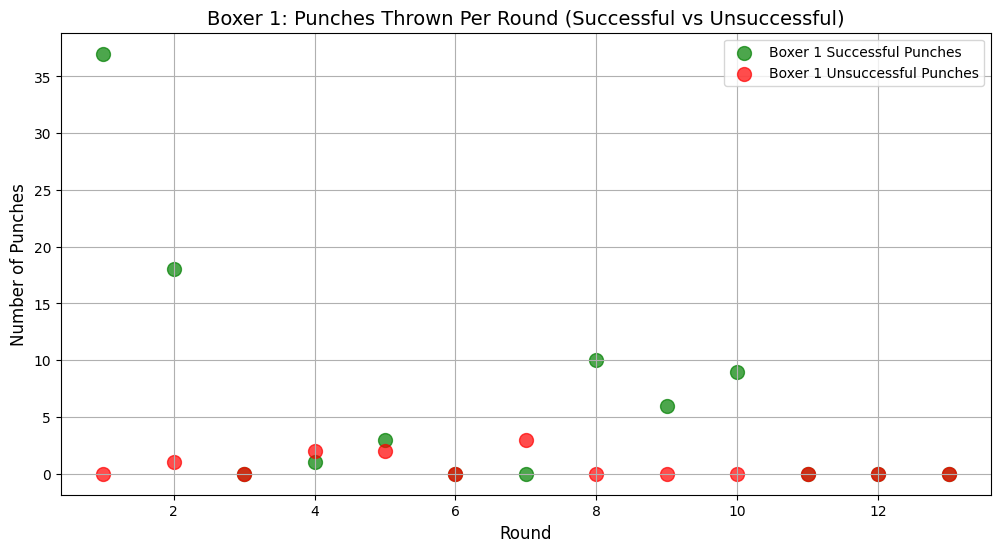

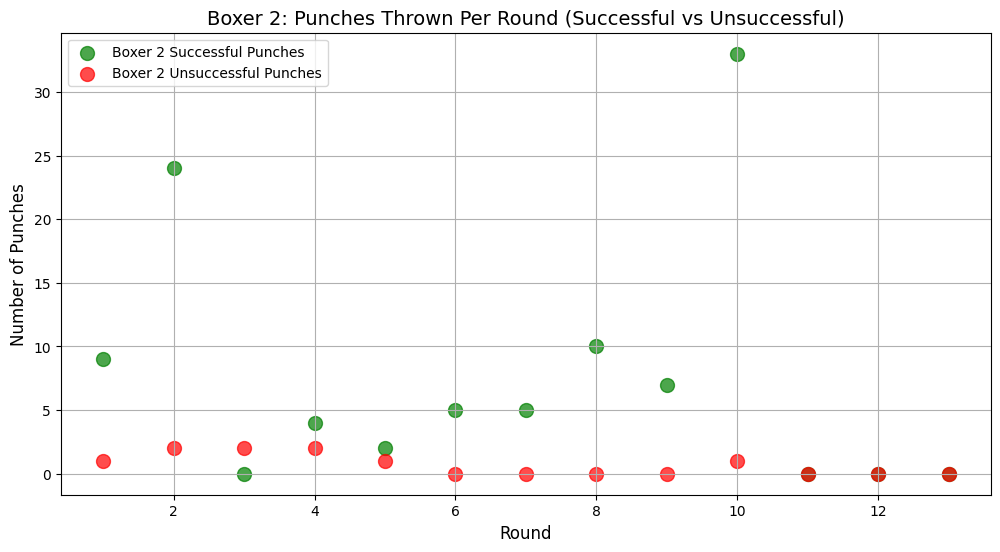

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the class labels
class_labels = [
    'boxer1', 'boxer2',
    'successfulstraightpunchboxer1', 'successfulstraightpunchboxer2',
    'unsuccessfulstraightpunchboxer1', 'unsuccessfulstraightpunchboxer2',
    'successfulhookboxer1', 'successfulhookboxer2',
    'unsuccessfulhookboxer1', 'unsuccessfulhookboxer2',
    'boxer1cut', 'boxer2cut',
    'boxer1knockdown', 'boxer2knockdown'
]

# Function to read predictions from the file
def read_predictions(file_path):
    predictions = []

    with open(file_path, 'r') as f:
        for line in f:
            # Remove any unwanted spaces and split by commas, then convert each part to an integer
            prediction = list(map(int, line.strip().split(',')))
            predictions.append(prediction)

    return predictions

# Function to calculate punches thrown per round for each boxer
def calculate_punches_per_round(predictions, num_rounds=12):
    round_punches = {'round': [], 'boxer1_successful': [], 'boxer1_unsuccessful': [], 'boxer2_successful': [], 'boxer2_unsuccessful': []}

    total_frames = len(predictions)
    round_length = total_frames // num_rounds  # Calculate round length based on total frames

    for i, prediction in enumerate(predictions):
        round_num = i // round_length  # Determine which round the frame belongs to

        # Ensure that we create only num_rounds rounds
        if round_num == len(round_punches['round']):
            round_punches['round'].append(round_num + 1)
            round_punches['boxer1_successful'].append(0)
            round_punches['boxer1_unsuccessful'].append(0)
            round_punches['boxer2_successful'].append(0)
            round_punches['boxer2_unsuccessful'].append(0)

        # Count successful and unsuccessful punches for boxer1
        boxer1_successful = prediction[class_labels.index('successfulstraightpunchboxer1')] + \
                            prediction[class_labels.index('successfulhookboxer1')]
        boxer1_unsuccessful = prediction[class_labels.index('unsuccessfulstraightpunchboxer1')] + \
                              prediction[class_labels.index('unsuccessfulhookboxer1')]

        # Count successful and unsuccessful punches for boxer2
        boxer2_successful = prediction[class_labels.index('successfulstraightpunchboxer2')] + \
                            prediction[class_labels.index('successfulhookboxer2')]
        boxer2_unsuccessful = prediction[class_labels.index('unsuccessfulstraightpunchboxer2')] + \
                              prediction[class_labels.index('unsuccessfulhookboxer2')]

        # Aggregate the punches in the corresponding round
        round_punches['boxer1_successful'][round_num] += boxer1_successful
        round_punches['boxer1_unsuccessful'][round_num] += boxer1_unsuccessful
        round_punches['boxer2_successful'][round_num] += boxer2_successful
        round_punches['boxer2_unsuccessful'][round_num] += boxer2_unsuccessful

    return pd.DataFrame(round_punches)

# Path to your predictions file
predictions_file = "/content/drive/MyDrive/Capstone/Data/testvideo/predictions.txt"

# Read the predictions from the file
predictions = read_predictions(predictions_file)

# Calculate punches thrown per round
punches_df = calculate_punches_per_round(predictions)

# Plotting scatter plot for Boxer 1
plt.figure(figsize=(12, 6))

# Scatter plot for Boxer 1 Successful Punches
plt.scatter(punches_df['round'], punches_df['boxer1_successful'], color='green', label='Boxer 1 Successful Punches', s=100, alpha=0.7)

# Scatter plot for Boxer 1 Unsuccessful Punches
plt.scatter(punches_df['round'], punches_df['boxer1_unsuccessful'], color='red', label='Boxer 1 Unsuccessful Punches', s=100, alpha=0.7)

# Adding Titles and Labels
plt.title('Boxer 1: Punches Thrown Per Round (Successful vs Unsuccessful)', fontsize=14)
plt.xlabel('Round', fontsize=12)
plt.ylabel('Number of Punches', fontsize=12)
plt.legend()

# Display the plot for Boxer 1
plt.grid(True)
plt.show()

# Plotting scatter plot for Boxer 2
plt.figure(figsize=(12, 6))

# Scatter plot for Boxer 2 Successful Punches
plt.scatter(punches_df['round'], punches_df['boxer2_successful'], color='green', label='Boxer 2 Successful Punches', s=100, alpha=0.7)

# Scatter plot for Boxer 2 Unsuccessful Punches
plt.scatter(punches_df['round'], punches_df['boxer2_unsuccessful'], color='red', label='Boxer 2 Unsuccessful Punches', s=100, alpha=0.7)

# Adding Titles and Labels
plt.title('Boxer 2: Punches Thrown Per Round (Successful vs Unsuccessful)', fontsize=14)
plt.xlabel('Round', fontsize=12)
plt.ylabel('Number of Punches', fontsize=12)
plt.legend()

# Display the plot for Boxer 2
plt.grid(True)
plt.show()
